# **Background & Business Understanding**
## **Background** 

---

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

*   If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
*   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## **Business Understanding** 
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

1.   Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
2.   Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
3.   Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

**Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Essentials
import numpy as np
import pandas as pd

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Model
from sklearn.model_selection import train_test_split, RandomizedSearchCV,  RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier

#Misc
import opendatasets as od
import warnings
warnings.filterwarnings('ignore')

In [ ]:
api = pd.read_json('kaggle.json', lines=True)
api

In [ ]:
od.download("https://www.kaggle.com/datasets/jeandedieunyandwi/lending-club-dataset")

100%|██████████| 27.6M/27.6M [00:00<00:00, 91.8MB/s]


In [ ]:
#Load dataset
df = pd.read_csv('/content/lending-club-dataset/lending_club_loan_two.csv')
pd.set_option('display.max_columns', None)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


#Data Understanding

---

<table>
  <tr>
    <th>Features</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>loan_amnt</td>
    <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value</td>
  </tr>
  <tr>
    <td>term</td>
    <td>The number of payments on the loan. Values are in months and can be either 36 or 60</td>
  </tr>
  <tr>
    <td>int_rate</td>
    <td>Interest Rate on the loan</td>
  </tr>
  <tr>
    <td>installment</td>
    <td>The monthly payment owed by the borrower if the loan originates</td>
  </tr>
  <tr>
    <td>grade</td>
    <td>LC assigned loan grade</td>
  </tr>
  <tr>
    <td>sub_grade</td>
    <td>LC assigned loan subgrade</td>
  </tr>
  <tr>
    <td>emp_title</td>
    <td>The job title supplied by the Borrower when applying for the loan</td>
  </tr>
  <tr>
    <td>emp_length</td>
    <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years</td>
  </tr>
  <tr>
    <td>home_ownership</td>
    <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
  </tr>
  <tr>
    <td>annual_inc</td>
    <td>The self-reported annual income provided by the borrower during registration</td>
  </tr>
  <tr>
    <td>verification_status</td>
    <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
  </tr>
  <tr>
    <td>issue_d</td>
    <td>The month which the loan was funded</td>
  </tr>
  <tr>
    <td>loan_status</td>
    <td>Current status of the loan</td>
  </tr>
  <tr>
    <td>purpose</td>
    <td>A category provided by the borrower for the loan request</td>
  </tr>
  <tr>
    <td>title</td>
    <td>The loan title provided by the borrower</td>
  </tr>
  <tr>
    <td>zip_code</td>
    <td>The first 3 numbers of the zip code provided by the borrower in the loan application</td>
  </tr>
  <tr>
    <td>addr_state</td>
    <td>The state provided by the borrower in the loan application</td>
  </tr>
  <tr>
    <td>dti</td>
    <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income</td>
  </tr>
  <tr>
    <td>earliest_cr_line</td>
    <td>The month the borrower's earliest reported credit line was opened</td>
  </tr>
  <tr>
    <td>open_acc</td>
    <td>The number of open credit lines in the borrower's credit file</td>
  </tr>
   <tr>
    <td>pub_rec</td>
    <td>Number of derogatory public records</td>
  </tr>
   <tr>
    <td>revol_bal</td>
    <td>Total credit revolving balance</td>
  </tr>
   <tr>
    <td>revol_util</td>
    <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit</td>
  </tr>
   <tr>
    <td>total_acc</td>
    <td>The total number of credit lines currently in the borrower's credit file</td>
  </tr>
  <tr>
    <td>initial_list_status</td>
    <td>The initial listing status of the loan. Possible values are – W, F</td>
  </tr>
   <tr>
    <td>application_type</td>
    <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
  </tr>
   <tr>
    <td>mort_acc</td>
    <td>Number of mortgage accounts</td>
  </tr>
   <tr>
    <td>pub_rec_bankruptcies</td>
    <td>Number of public record bankruptcies</td>
  </tr>
</table>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

#Exploratory Data Analysis

###Checking Data Distribution

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df1 = df.copy() #Just to make sure I didn't do something irreversible

In [ ]:
nums = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

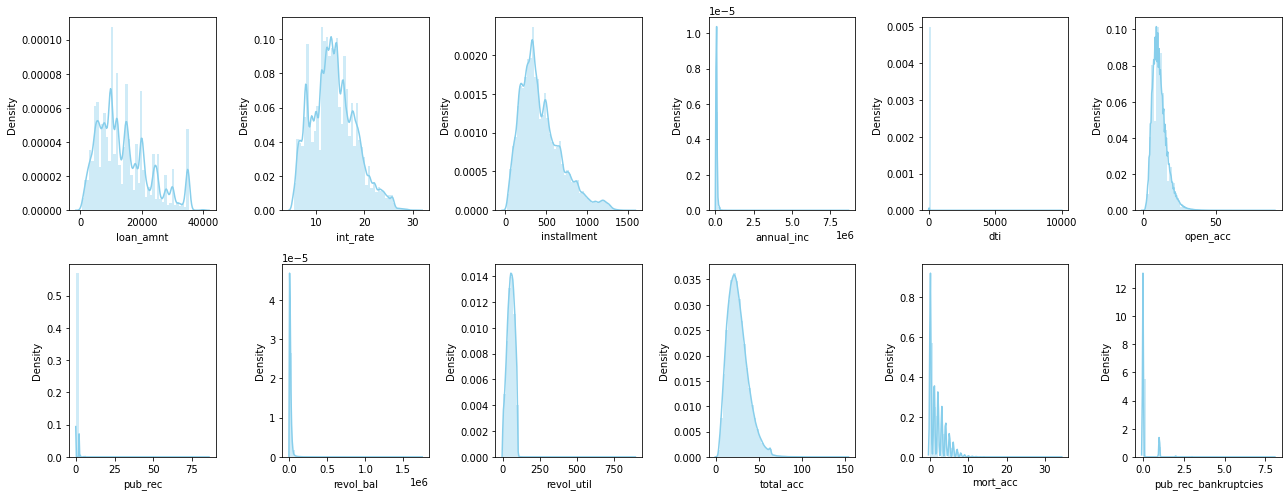

In [ ]:
#Check distribution data

plt.figure(figsize=(18,7))

features = nums
for i in range(0, len(features)):
    plt.subplot(2, 6, i+1)
    sns.distplot(x=df1[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

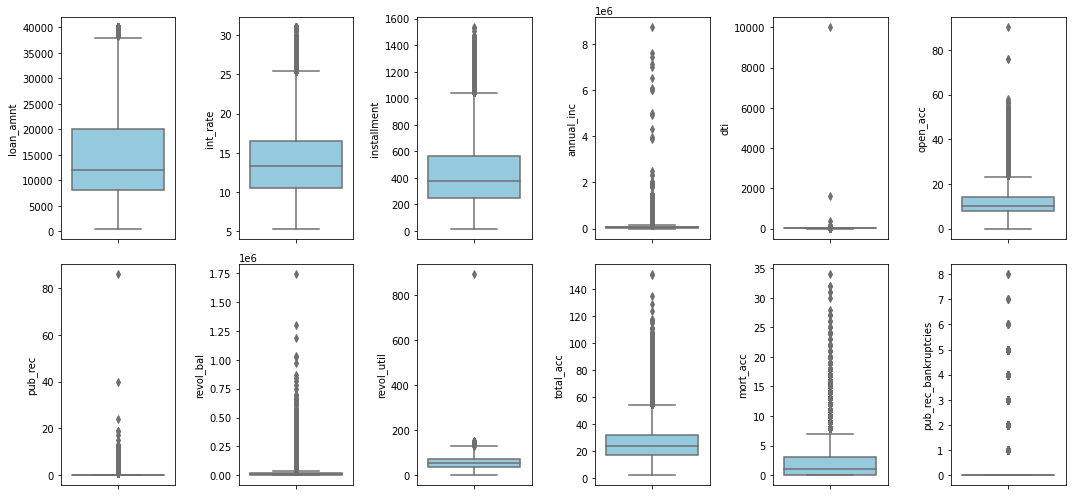

In [ ]:
#Check data outliers
plt.figure(figsize=(15,7))

features = nums
for i in range(0, len(features)):
  plt.subplot(2, 6, i+1)
  sns.boxplot(y = df1[features[i]], color='skyblue')
  plt.tight_layout()

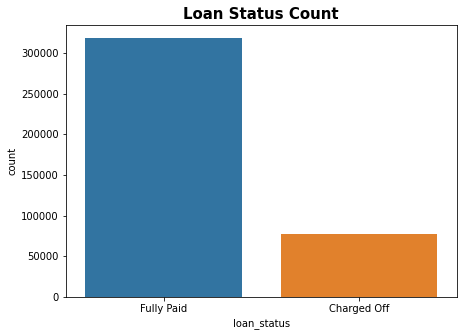

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(df.loan_status)
ax.set_title('Loan Status Count', fontsize= 15,fontweight='bold')
sns.set_style("whitegrid")

Since target variable is imbalanced, AUC score is more preferred for evaluating the machine learning model rather than the accuracy.

##Checking The Features

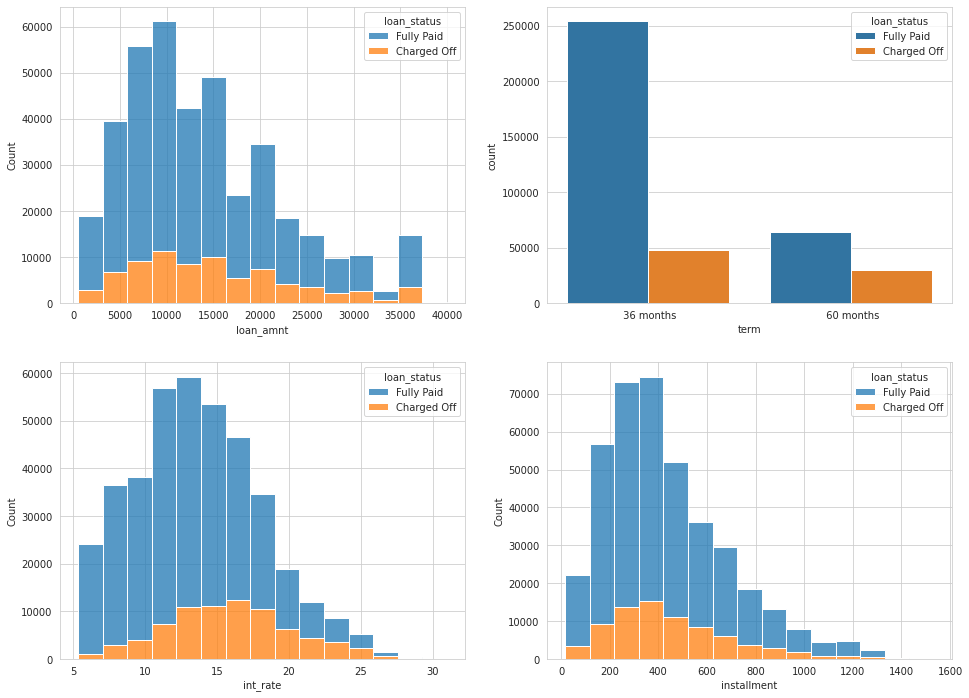

In [ ]:
#loan_amnt, term, int_rate, installment
fig, ax = plt.subplots(2,2, figsize=(16,12))

#plot loan_amnt
sns.histplot(data=df1, x='loan_amnt', hue='loan_status', bins=15, ax=ax[0,0], multiple='stack')

#plot term
sns.countplot(data=df1, x='term',  hue='loan_status', ax=ax[0,1])

#plot int_rate
sns.histplot(data=df1, x='int_rate', hue='loan_status', bins=15, ax=ax[1,0], multiple='stack')

#plot installment
sns.histplot(data=df1, x='installment', hue='loan_status', bins=15, ax=ax[1,1], multiple='stack')

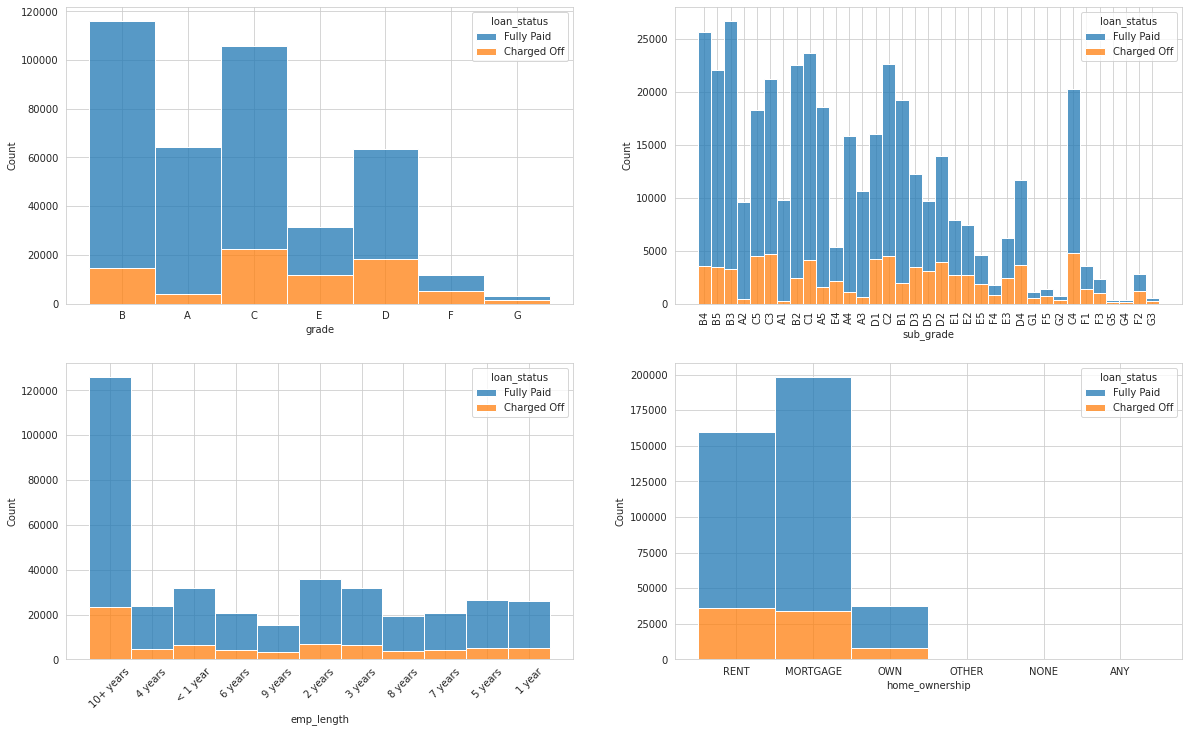

In [ ]:
#grade, sub_grade, emp_length, home_ownership
fig, ax = plt.subplots(2,2, figsize=(20,12))

#plot grade
sns.histplot(data=df1, x='grade', hue='loan_status', ax=ax[0,0], multiple='stack')

#plot sub_grade
sns.histplot(data=df1, x='sub_grade', hue='loan_status', ax=ax[0,1], multiple='stack')
ax[0,1].tick_params(axis ='x', rotation = 90)

#plot emp_length
sns.histplot(data=df1, x='emp_length', hue='loan_status', ax=ax[1,0], multiple='stack')
ax[1,0].tick_params(axis ='x', rotation = 45)

#plot home_ownership
sns.histplot(data=df1, x='home_ownership', hue='loan_status', ax=ax[1,1], multiple='stack')

*   Grade E, F, G have charge off borrowers in 50% approximately from total transaction
*   Most of borrowers does not have yet a house, they still have rent and mortgage the house

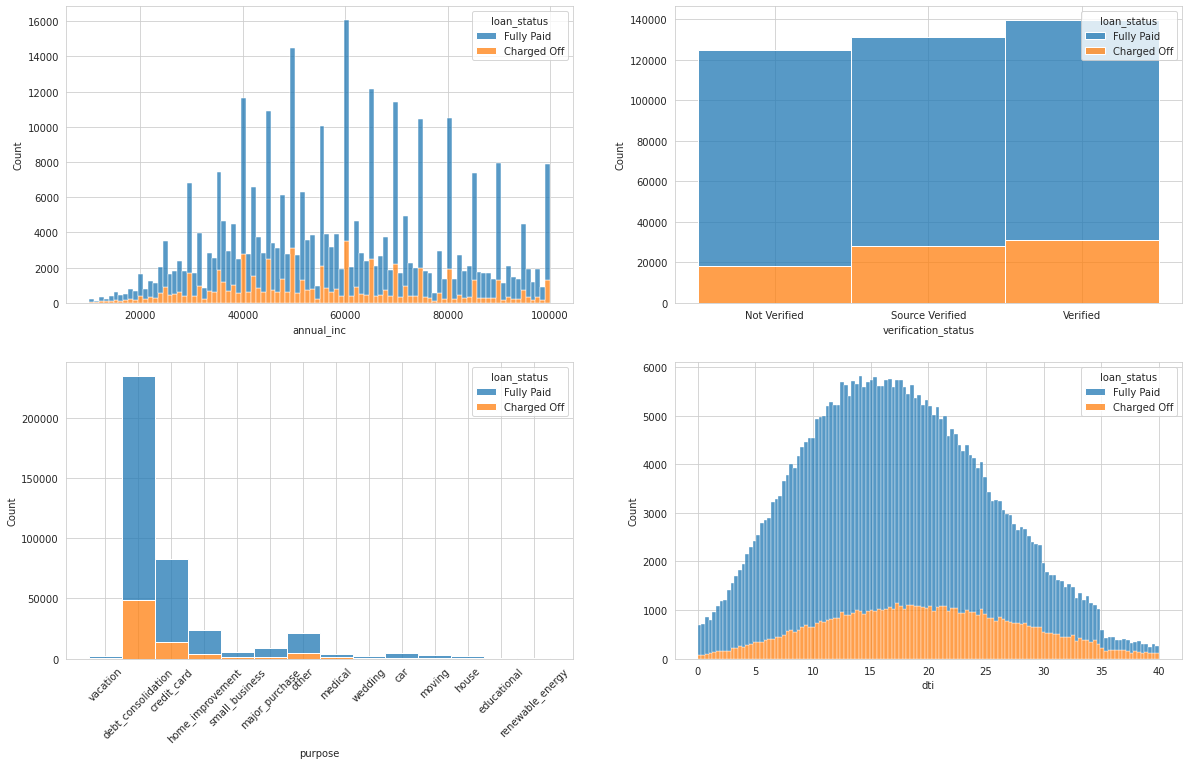

In [ ]:
#annual_inc, verification_status, purpose, dti
fig, ax = plt.subplots(2,2, figsize=(20,12))

#plot annual_inc
annual_inc1 = df1[(df1['annual_inc'] >= 10000) & (df1['annual_inc'] <= 100000)]
sns.histplot(data=annual_inc1, x='annual_inc', hue='loan_status', ax=ax[0,0], multiple='stack')

#plot verification_status
sns.histplot(data=df1, x='verification_status', hue='loan_status', ax=ax[0,1], multiple='stack')

#plot purpose
sns.histplot(data=df1, x='purpose', hue='loan_status', ax=ax[1,0], multiple='stack')
ax[1,0].tick_params(axis ='x', rotation = 45)

#plot dti
dti40 = df1[df1['dti'] <= 40]
sns.histplot(data=dti40, x='dti', hue='loan_status', ax=ax[1,1], multiple='stack')

Surprisingly, the pupose to get a loan is for vacation than any others primers needed. It can be a new innovation that company to more research where the borrowers going to in vacation. May with some promo's or collaboration with travel company can generate more 'tourist' to take a loan.

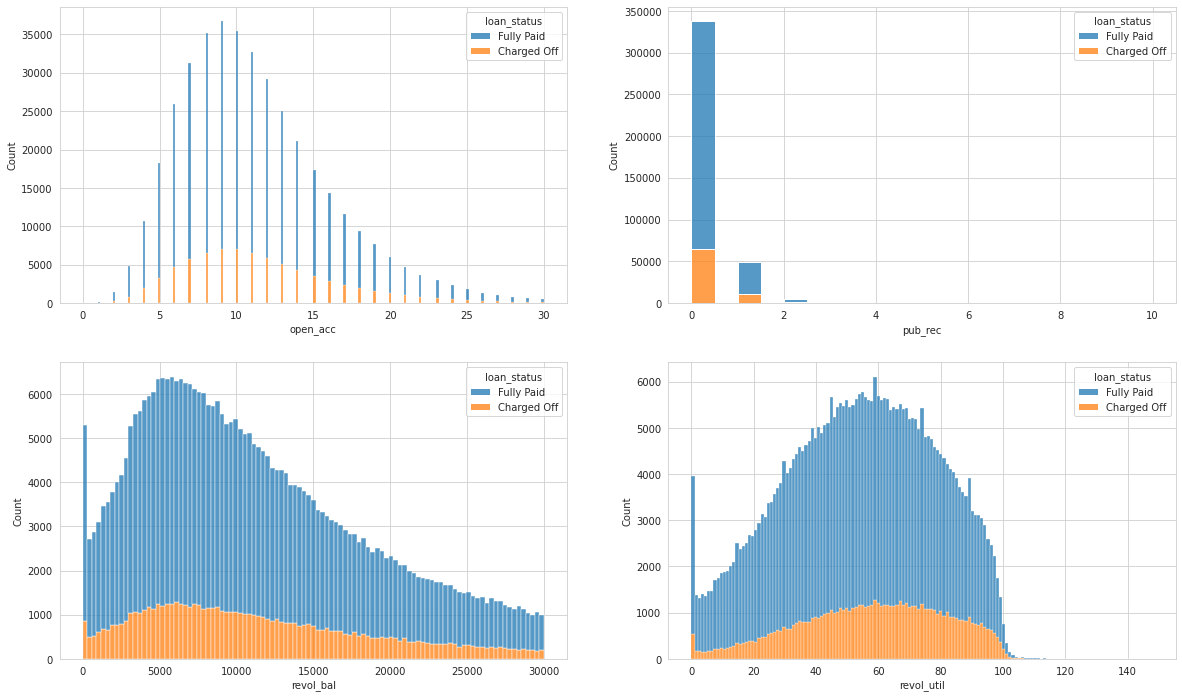

In [ ]:
#open_acc, pub_rec, revol_bal, revol_util
fig, ax = plt.subplots(2,2, figsize=(20,12))

#plot open_acc
open_acc1 = df1[(df1['open_acc'] <= 30)]
sns.histplot(data=open_acc1, x='open_acc', hue='loan_status', ax=ax[0,0], multiple='stack')

#plot pub_rec
pub_rec1 = df1[(df1['pub_rec'] <= 10)]
sns.histplot(data=pub_rec1, x='pub_rec', hue='loan_status', ax=ax[0,1], multiple='stack')

#plot revol_bal
revol_bal1 = df1[(df1['revol_bal'] <= 30000)]
sns.histplot(data=revol_bal1, x='revol_bal', hue='loan_status', ax=ax[1,0], multiple='stack')

#plot revol_util
revol_util1 = df1[df1['revol_util'] <= 150]
sns.histplot(data=revol_util1, x='revol_util', hue='loan_status', ax=ax[1,1], multiple='stack')

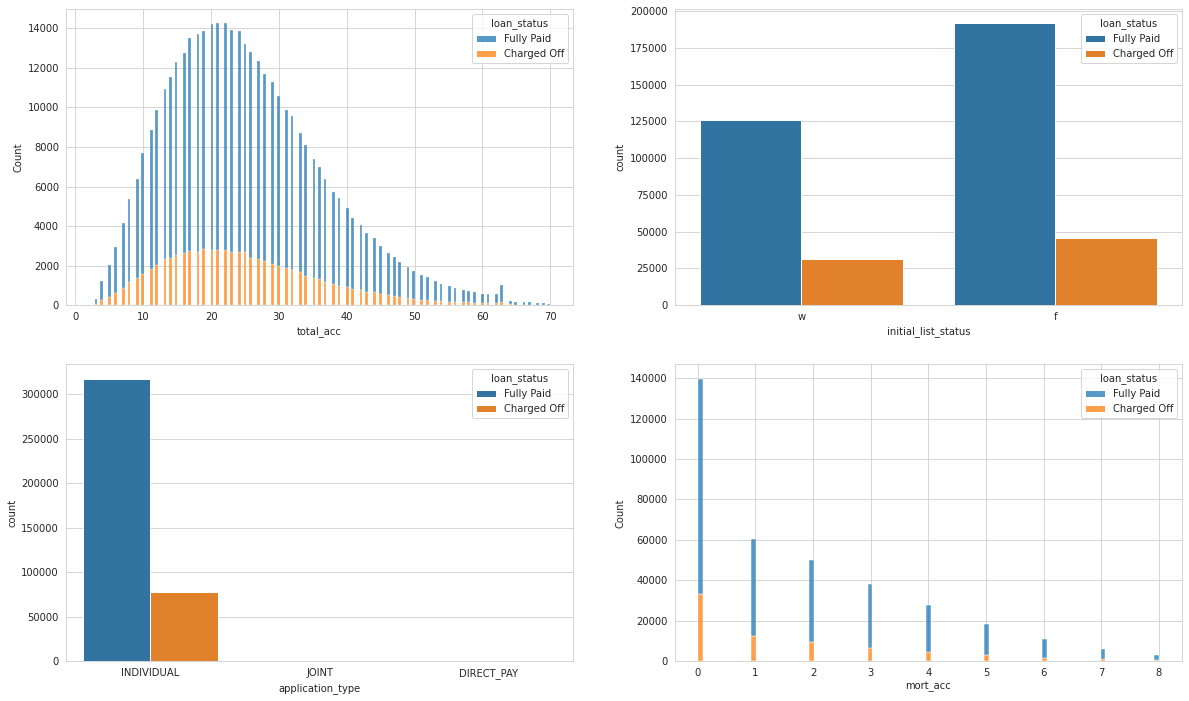

In [ ]:
#total_acc, initial_list_status, application_type, mort_acc
fig, ax = plt.subplots(2,2, figsize=(20,12))

#plot total_acc
total_acc1 = df1[(df1['total_acc'] <= 70)]
sns.histplot(data=total_acc1, x='total_acc', hue='loan_status', ax=ax[0,0], multiple='stack')

#plot initial_list_status
sns.countplot(data=df1, x='initial_list_status', hue='loan_status', ax=ax[0,1])

#plot application_type
sns.countplot(data=df1, x='application_type', hue='loan_status', ax=ax[1,0])

#plot mort_acc
mort_acc1 = df1[df1['mort_acc'] <= 8]
sns.histplot(data=mort_acc1, x='mort_acc', hue='loan_status', ax=ax[1,1], multiple='stack')

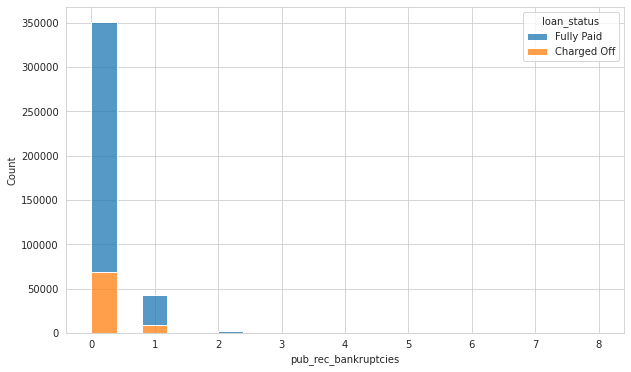

In [ ]:
#plot pub_rec_bankruptcies
fig, ax =plt.subplots(figsize=(10,6))
sns.histplot(data=df1, x='pub_rec_bankruptcies', hue='loan_status', multiple='stack')

Loan issued

In [ ]:
df1.issue_d.value_counts()

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [ ]:
df1['year_issued'] = df1['issue_d'].str[-4:] #slice years element of issued loan

In [ ]:
loan_year = df1.groupby(['year_issued'])['issue_d'].count().to_frame().rename(columns={'issue_d':'count'}).reset_index()
loan_year

,year_issued,count
0,2007,195
1,2008,1240
2,2009,3826
3,2010,9258
4,2011,17435
5,2012,41202
6,2013,97662
7,2014,102860
8,2015,94264
9,2016,28088


Text(0.5, 0, 'Year')

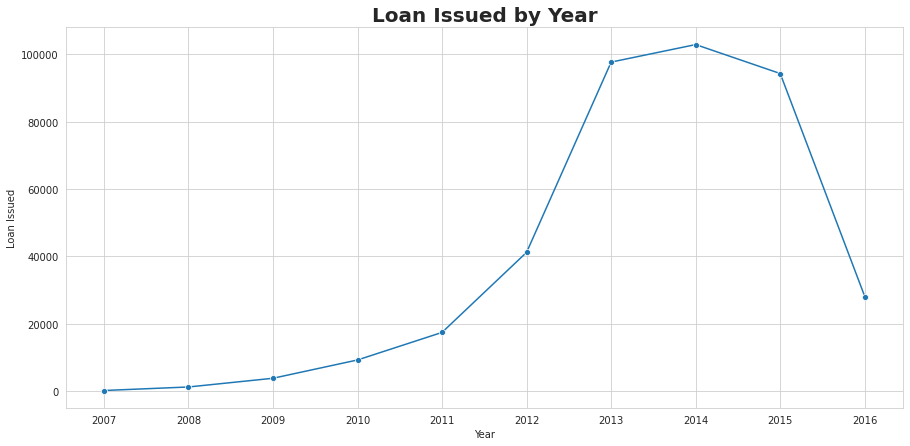

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(data=loan_year, x='year_issued', y='count', marker='o')
ax.set_title('Loan Issued by Year', fontsize=20, fontweight='bold')
ax.set_ylabel('Loan Issued')
ax.set_xlabel('Year')

Loans issued in 2016 fell down considerably compared to the previous three years, although the data is only up to November 2016

In [ ]:
df1[df1['issue_d'] == 'Des-2016']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,year_issued


Some features cannot be visualized are `emp_title`, `title`, `earliest_cr_line`, `address` because many unique values ​​are in string format, so the graph can't show the patterns.

#**Analyzing & Modelling**

##Data Preprocessing

In [ ]:
#Checking missing value in percentage
df1.isnull().sum() * 100 / len(df1)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
year_issued             0.000000
dtype: float64

In [ ]:
#Calculate missing values
missingdf1 = df1.isnull().any(axis=1) 
df1[missingdf1].count()[0]/df1.count()[0]*100

15.191273388379667

More than 5% missing values, so we will dig dive into those missing values

In [ ]:
#emp_title feature's check
print('The unique values of emp_title are', df1.emp_title.nunique())
print('====================================')
print(df1.emp_title.value_counts())

The unique values of emp_title are 173105
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64


To much unique value in string format makes its feature hard to convert in dummy variable. So this variable will be remove

In [ ]:
#emp_length feature's check
print('The unique values of emp_length are', df1.emp_length.nunique())
print('====================================')
print(df1.emp_length.value_counts())

The unique values of emp_length are 11
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64


In [ ]:
for year in df1.emp_length.unique():
    print(f"{year} in this position:")
    print(f"{df1[df1.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years in this position:
Fully Paid     0.815814
Charged Off    0.184186
Name: loan_status, dtype: float64
4 years in this position:
Fully Paid     0.807615
Charged Off    0.192385
Name: loan_status, dtype: float64
< 1 year in this position:
Fully Paid     0.793128
Charged Off    0.206872
Name: loan_status, dtype: float64
6 years in this position:
Fully Paid     0.810806
Charged Off    0.189194
Name: loan_status, dtype: float64
9 years in this position:
Fully Paid     0.79953
Charged Off    0.20047
Name: loan_status, dtype: float64
2 years in this position:
Fully Paid     0.806738
Charged Off    0.193262
Name: loan_status, dtype: float64
3 years in this position:
Fully Paid     0.804769
Charged Off    0.195231
Name: loan_status, dtype: float64
8 years in this position:
Fully Paid     0.80024
Charged Off    0.19976
Name: loan_status, dtype: float64
7 years in this position:
Fully Paid     0.805226
Charged Off    0.194774
Name: loan_status, dtype: float64
5 years in this position:
Ful

Charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.

In [ ]:
#title feature's check
print('The unique values of title are', df1.title.nunique())
print('====================================')
print(df1.title.value_counts())

The unique values of title are 48817
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64


To much unique value in string format makes its feature hard to convert in dummy variable. So this variable will be remove

In [ ]:
#revol_util feature's check
print('The unique values of revol_util are', df1.revol_util.nunique())
print('====================================')
print(df1.revol_util.value_counts())

The unique values of revol_util are 1226
0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: revol_util, Length: 1226, dtype: int64


In [ ]:
#mort_acc feature's check
print('The unique values of mort_acc are', df1.mort_acc.nunique())
print('====================================')
print(df1.mort_acc.value_counts())

The unique values of mort_acc are 33
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64


In [ ]:
#pub_rec_bankruptcies feature's check
print('The unique values of pub_rec_bankruptcies are', df1.pub_rec_bankruptcies.nunique())
print('====================================')
print(df1.pub_rec_bankruptcies.value_counts())

The unique values of pub_rec_bankruptcies are 9
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64


In [ ]:
#earliest_cr_line feature's check
print('The unique values of earliest_cr_line are', df1.earliest_cr_line.nunique())
print('====================================')
print(df1.earliest_cr_line.value_counts())

The unique values of earliest_cr_line are 684
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64


In [ ]:
#Drop some features
df1.drop(['emp_title', 'emp_length', 'title'], axis=1, inplace=True)

###Imputing missing **data**

In [ ]:
#Fill mort_acc Nan values with mean from df_train
acc_avg = df1.mort_acc.mean()
df1['mort_acc'] = df1['mort_acc'].fillna(value=acc_avg)

In [ ]:
#Fill pub_rec_bankruptcies Nan values with mean from df_train
pub_rec = df1.pub_rec_bankruptcies.mean()
df1['pub_rec_bankruptcies'] = df1['pub_rec_bankruptcies'].fillna(value=pub_rec)

In [ ]:
#Fill revol_util  Nan values with mean from df_train
rev_util = df1.revol_util.mean()
df1['revol_util'] = df1['revol_util'].fillna(value=rev_util)

In [ ]:
df1.isnull().sum() * 100 / len(df1)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
year_issued             0.0
dtype: float64

In [ ]:
#Check duplicated data
df1.duplicated().sum()

0

###Encoding Data to Numerical Features

In [ ]:
print([column for column in df1.columns if df1[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address', 'year_issued']


In [ ]:
#term
term_values = {' 36 months': 36, ' 60 months': 60}
df1['term'] = df1['term'].map(term_values)

In [ ]:
df1['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

In [ ]:
#sub_grade only more explanation of grade, so we consider to drop it
df1.drop('sub_grade', axis=1, inplace=True)

In [ ]:
#convert some features to dummies variable
dummies = ['grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
df1 = pd.get_dummies(df1, columns=dummies, drop_first=True)

In [ ]:
#Drop address cause it can't convert to numerical value
df1.drop('address', axis=1, inplace=True)

In [ ]:
#Drop issue_d & year_issued cause possibly it can make data leakage 
df1.drop(['issue_d', 'year_issued'], axis=1, inplace=True)

In [ ]:
# Get year element rom earliest_cr_line
import datetime as dt
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], errors='coerce')
df1['earliest_cr_line'] = df1.earliest_cr_line.dt.year

In [ ]:
#Convert target variable to numerical value
df1['loan_status'] = df1['loan_status'].map({'Fully Paid':0, 'Charged Off': 1})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   loan_status                          396030 non-null  int64  
 6   dti                                  396030 non-null  float64
 7   earliest_cr_line                     396030 non-null  int64  
 8   open_acc                             396030 non-null  float64
 9   pub_rec                              396030 non-null  float64
 10  revol_bal                            396030 non-null  float64
 11  revol_util   

##Baseline Model (Logistic Regression with Numerical Features)

In [ ]:
X = df1[(nums)]
y = df1[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
def evaluate(model, x_test = X_test, y_test = y_test):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

    plot_roc_curve(model, x_test, y_test)
    print('Area under Curve of the ROC:', roc_auc_score(y_test,
                                                       model.predict_proba(x_test)[:,1]))

Accuracy: 0.8030199732343509
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63629
           1       0.23      0.00      0.00     15577

    accuracy                           0.80     79206
   macro avg       0.52      0.50      0.45     79206
weighted avg       0.69      0.80      0.72     79206

------
Assuming 1 as positive, we get:

True Positive: 11
True Negative: 63593
False Positive: 36
False Negative: 15566

Precision: 0.23404255319148937
Recall: 0.0007061693522501123
F1-Score: 0.0014080901177675371
Area under Curve of the ROC: 0.5773527629878406


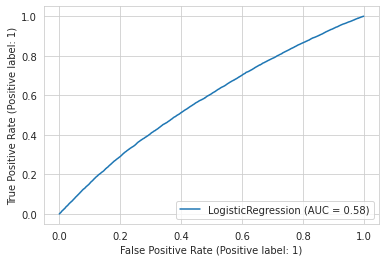

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
evaluate(logreg)

##Baseline Model with Categorical Columns

In [ ]:
X = df1.drop('loan_status', axis=1)
y = df1[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Accuracy: 0.8044971340555008
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     63629
           1       0.52      0.08      0.13     15577

    accuracy                           0.80     79206
   macro avg       0.67      0.53      0.51     79206
weighted avg       0.76      0.80      0.74     79206

------
Assuming 1 as positive, we get:

True Positive: 1191
True Negative: 62530
False Positive: 1099
False Negative: 14386

Precision: 0.5200873362445415
Recall: 0.0764588816845349
F1-Score: 0.1333184082386523
Area under Curve of the ROC: 0.7014403217846171


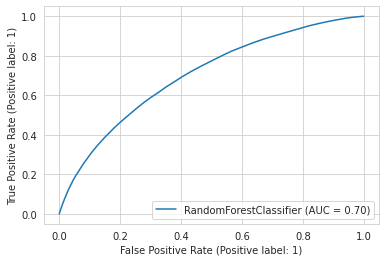

In [ ]:
#Random Forest
rand_forest = RandomForestClassifier(random_state = 1, n_jobs = -1)
rand_forest.fit(X_train, y_train)
evaluate(rand_forest, X_test, y_test)

Accuracy: 0.8058354165088504
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     63629
           1       0.57      0.05      0.10     15577

    accuracy                           0.81     79206
   macro avg       0.69      0.52      0.49     79206
weighted avg       0.76      0.81      0.74     79206

------
Assuming 1 as positive, we get:

True Positive: 842
True Negative: 62985
False Positive: 644
False Negative: 14735

Precision: 0.566621803499327
Recall: 0.05405405405405406
F1-Score: 0.09869307859110356
Area under Curve of the ROC: 0.7104778581242744


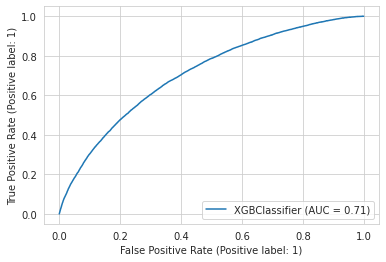

In [ ]:
#XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)
evaluate(xgb_clf, X_test, y_test)

Accuracy: 0.8064919324293615
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     63629
           1       0.56      0.07      0.13     15577

    accuracy                           0.81     79206
   macro avg       0.69      0.53      0.51     79206
weighted avg       0.76      0.81      0.74     79206

------
Assuming 1 as positive, we get:

True Positive: 1106
True Negative: 62773
False Positive: 856
False Negative: 14471

Precision: 0.563710499490316
Recall: 0.07100211850805675
F1-Score: 0.12611893494497978
Area under Curve of the ROC: 0.7169184885759242


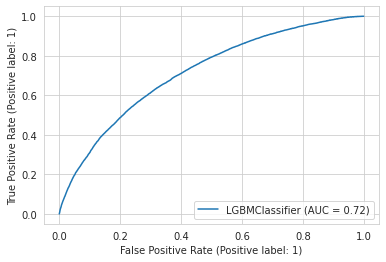

In [ ]:
#LGBMClassifier
lgbm = LGBMClassifier(use_label_encoder=False)
lgbm.fit(X_train, y_train)
evaluate(lgbm, X_test, y_test)

## Improvement : Standardization

In [ ]:
X_train_std = X_train.copy()
X_test_std = X_test.copy()
y_train_std = y_train.copy()
y_test_std = y_test.copy()

In [ ]:
#Standardization train_data
scaler = StandardScaler()
X_train_std  = scaler.fit_transform(X_train_std)

Accuracy: 0.8033356058884428
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63629
           1       0.00      0.00      0.00     15577

    accuracy                           0.80     79206
   macro avg       0.40      0.50      0.45     79206
weighted avg       0.65      0.80      0.72     79206

------
Assuming 1 as positive, we get:

True Positive: 0
True Negative: 63629
False Positive: 0
False Negative: 15577

Precision: nan
Recall: 0.0
F1-Score: nan
Area under Curve of the ROC: 0.508712509000905


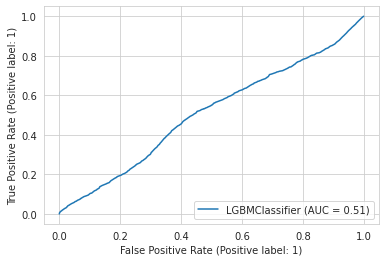

In [ ]:
#LGBMClassifier
lgbm = LGBMClassifier(use_label_encoder=False)
lgbm.fit(X_train_std, y_train_std)
evaluate(lgbm, X_test_std, y_test_std)

Accuracy: 0.7856349266469712
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     63629
           1       0.23      0.04      0.07     15577

    accuracy                           0.79     79206
   macro avg       0.52      0.50      0.47     79206
weighted avg       0.69      0.79      0.72     79206

------
Assuming 1 as positive, we get:

True Positive: 605
True Negative: 61622
False Positive: 2007
False Negative: 14972

Precision: 0.23162327718223583
Recall: 0.03883931437375618
F1-Score: 0.0665237231293639
Area under Curve of the ROC: 0.5601939461503714


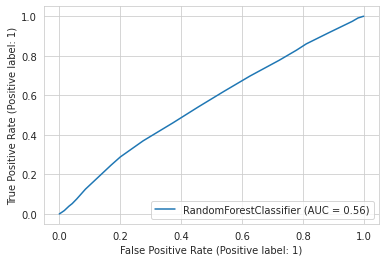

In [ ]:
#Random Forest
rand_forest = RandomForestClassifier(random_state = 1, n_jobs = -1)
rand_forest.fit(X_train_std, y_train_std)
evaluate(rand_forest, X_test_std, y_test_std)

In theory, scaling can't affect in tree models, but we get more worse in roc_auc score when using standardization.

##Improvement : Tuning Hyperparameter

In [ ]:
%%time
# LGBM using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

lgbm_randomcv = RandomizedSearchCV(lgbm, parameters, cv=5, 
                                     scoring='roc_auc', n_iter=10)
lgbm_randomcv.fit(X_train, y_train)

CPU times: user 1min 44s, sys: 1.01 s, total: 1min 45s
Wall time: 1min 46s


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(use_label_encoder=False),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='roc_auc')

Accuracy: 0.8057596646718683
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     63629
           1       0.58      0.04      0.08     15577

    accuracy                           0.81     79206
   macro avg       0.70      0.52      0.49     79206
weighted avg       0.76      0.81      0.73     79206

------
Assuming 1 as positive, we get:

True Positive: 672
True Negative: 63149
False Positive: 480
False Negative: 14905

Precision: 0.5833333333333334
Recall: 0.043140527701097775
F1-Score: 0.08033953015721203
Area under Curve of the ROC: 0.7114462766616326


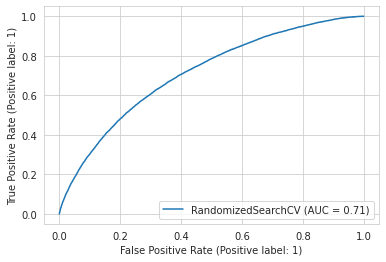

In [ ]:
#Light GBM
evaluate(lgbm_randomcv, X_test, y_test)

In [ ]:
%%time
# Random forest using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rand_forest, parameters, cv=5, 
                                     scoring='roc_auc', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 48.4 s, sys: 2.65 s, total: 51 s
Wall time: 4min 14s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='roc_auc')

Accuracy: 0.8033356058884428
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63629
           1       0.00      0.00      0.00     15577

    accuracy                           0.80     79206
   macro avg       0.40      0.50      0.45     79206
weighted avg       0.65      0.80      0.72     79206

------
Assuming 1 as positive, we get:

True Positive: 0
True Negative: 63629
False Positive: 0
False Negative: 15577

Precision: nan
Recall: 0.0
F1-Score: nan
Area under Curve of the ROC: 0.6992174807698652


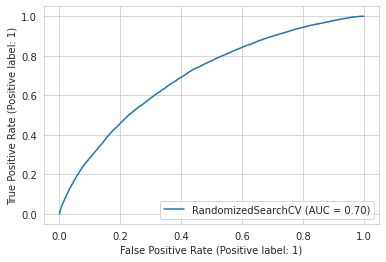

In [ ]:
#Random Forest
evaluate(rf_clf_randomcv, X_test, y_test)

##Feature Importance

In [ ]:
feature_imp = pd.DataFrame(zip(X_train.columns, lgbm.feature_importances_))
feature_imp = feature_imp.rename({0:'Feature Name', 1:'Importance'}, axis = 'columns')
feature_imp = feature_imp.sort_values(by=['Importance'], ascending = [False]).reset_index(drop = True)

In [ ]:
feature_imp.head(10)

,Feature Name,Importance
0,int_rate,370
1,annual_inc,347
2,dti,262
3,revol_util,247
4,revol_bal,228
5,loan_amnt,198
6,earliest_cr_line,197
7,installment,189
8,open_acc,159
9,total_acc,140


#Conclusion
*   The top 5 most important features based on our model are 
1. `int_rate`: Interest Rate on the loan. Based on the graph, most borrowers like the interest rate in range 11 - 16
2. `annual_inc`: The self-reported annual income provided by the borrower during registration.
3. `dti`: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. Most borrower have dti in range 10 - 25
4. `revo_util` : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit
5. `revo_bal`: Total credit revolving balance

*   The most suitable models for this case are light gbm with a roc auc score of around 72%. Which can be used to predict whether the borrower will paying the loan or not.